In [48]:
# Movie_DataBase Classification with linear/polynomial regression model analysis 

import pandas as pd
import numpy as np

#to deal with the probelm of file read
import chardet

import matplotlib.pyplot as plt
import seaborn as sns

#for predictive analsis
import datetime
from scipy import stats

In [5]:
movies_data=pd.read_csv(r'E:\Data_science\movies_data\movies.csv')
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies_data.shape

(27278, 3)

In [7]:
# subset the movies which has Action, Romanace, Comedy and Thriller

movies_data['genres_subset'] = movies_data['genres'].str.split('|')
movies_data.head()

,movieId,title,genres,genres_subset
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [8]:
interested_in_lambda = lambda x: set(['Romance', 'Comedy', 'Action', 'Thriller']).issubset(x)
interested_in = movies_data[movies_data.genres_subset.map(interested_in_lambda)]
print('# interested in following movies') 
print('Total number of movies in which you are interested in are', len(interested_in.index))
interested_in

# interested in following movies
Total number of movies in which you are interested in are 13


,movieId,title,genres,genres_subset
376,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
2383,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
4624,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma..."
4860,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th..."
6454,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
6604,6714,So Close (Chik Yeung Tin Sai) (2002),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
9691,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller,"[Action, Adventure, Comedy, Crime, Romance, Th..."
10290,34435,Sholay (1975),Action|Adventure|Comedy|Musical|Romance|Thriller,"[Action, Adventure, Comedy, Musical, Romance, ..."
12190,55603,My Mom's New Boyfriend (2008),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
14975,75408,Lupin III: Sweet Lost Night (Rupan Sansei: Swe...,Action|Animation|Comedy|Crime|Drama|Mystery|Ro...,"[Action, Animation, Comedy, Crime, Drama, Myst..."


In [9]:
#adding another column for the total number of genres for each movie

count_lambda = lambda x: len(x)
movies_data['genre_count'] = movies_data.genres_subset.apply(count_lambda)
movies_data.head()

,movieId,title,genres,genres_subset,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


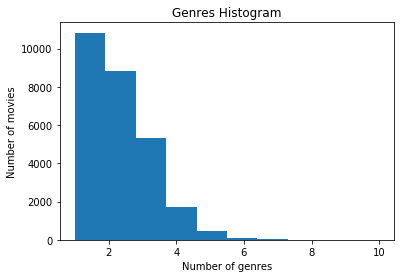

In [10]:
plt.hist(movies_data.genre_count)
plt.title('Genres Histogram')
plt.xlabel('Number of genres')
plt.ylabel('Number of movies')
plt.show()

In [11]:
#classification of genre

from collections import Counter 

classes_in_genres = [item for sublist in movies_data.genres_subset for item in sublist]

genre_classes_dict = dict(Counter(classes_in_genres))

print("the count of each genre is", genre_classes_dict)

the count of each genre is {'Adventure': 2329, 'Animation': 1027, 'Children': 1139, 'Comedy': 8374, 'Fantasy': 1412, 'Romance': 4127, 'Drama': 13344, 'Action': 3520, 'Crime': 2939, 'Thriller': 4178, 'Horror': 2611, 'Mystery': 1514, 'Sci-Fi': 1743, 'IMAX': 196, 'Documentary': 2471, 'War': 1194, 'Musical': 1036, 'Western': 676, 'Film-Noir': 330, '(no genres listed)': 246}


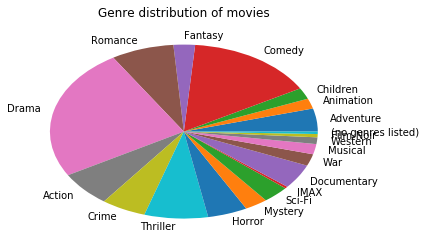

In [12]:
# genre distribution as a pie chart

plt.pie(genre_classes_dict.values(), labels=genre_classes_dict.keys())
plt.title('Genre distribution of movies')
plt.show()

[]

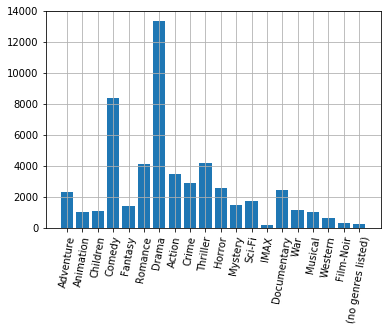

In [13]:
#pie charts are ok but bar charts provides better visuilization
x = list(range(len(genre_classes_dict)))
plt.xticks(x,genre_classes_dict.keys(), rotation=80)
plt.bar(x, genre_classes_dict.values())
plt.grid()
plt.plot()

In [14]:
ratings_data=pd.read_csv(r'E:\Data_science\movies_data\ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [15]:
#how many ratings do we have 

print('**# ratings**', len(ratings_data.index))

#how many different moveis have been rated?

print("**# movies have been rated", len(ratings_data.movieId.unique()))

#what are the different ratings given by the user

print("*#rating values*", ratings_data.rating.unique())

**# ratings** 100004
**# movies have been rated 9066
*#rating values* [ 2.5  3.   2.   4.   3.5  1.   5.   4.5  1.5  0.5]


In [16]:
# average movie rating across all ratings

np.mean(ratings_data.rating)

3.543608255669773

In [17]:
#median of rating

np.median(ratings_data.rating)

4.0

In [18]:
#percentile rating
print('The 30th percentile rating is', np.percentile(ratings_data.rating, 30))
print('The 40th percentile rating is', np.percentile(ratings_data.rating, 40))
print('The 50th percentile rating is', np.percentile(ratings_data.rating, 50))

The 30th percentile rating is 3.0
The 40th percentile rating is 3.5
The 50th percentile rating is 4.0


In [20]:
#most common rating by the user to movie
stats.mode(ratings_data.rating)

ModeResult(mode=array([ 4.]), count=array([28750]))

<function matplotlib.pyplot.show>

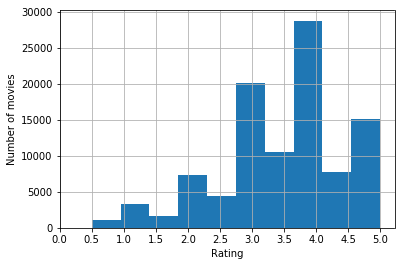

In [21]:
#histogram of a movie's rating

plt.hist(ratings_data.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.grid()
plt.show

In [22]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [23]:
#highest average rating
ratings = ratings_data[['movieId','rating']]
ratings.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
9065,163949,5.0
7297,71180,5.0
6629,51471,5.0
6662,52617,5.0
6704,53887,5.0
6717,54251,5.0
6726,54328,5.0
6785,55555,5.0
6836,56869,5.0
6843,57038,5.0


In [50]:
#merge the movies dataset and ratings dataset to have a better view
merge_data = pd.merge(ratings_data,movies_data, on='movieId')
merge_data

,userId,movieId,rating,timestamp,title,genres,genres_subset,genre_count
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,[Drama],1
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,[Drama],1
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,[Drama],1
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,[Drama],1
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,[Drama],1
5,39,31,3.0,832525157,Dangerous Minds (1995),Drama,[Drama],1
6,73,31,3.5,1255591860,Dangerous Minds (1995),Drama,[Drama],1
7,88,31,3.0,1239755559,Dangerous Minds (1995),Drama,[Drama],1
8,96,31,2.5,1223256331,Dangerous Minds (1995),Drama,[Drama],1
9,110,31,4.0,840100695,Dangerous Minds (1995),Drama,[Drama],1


In [25]:
titles = merge_data[['movieId','title','rating']]
titles.head()

,movieId,title,rating
0,31,Dangerous Minds (1995),2.5
1,31,Dangerous Minds (1995),3.0
2,31,Dangerous Minds (1995),4.0
3,31,Dangerous Minds (1995),4.0
4,31,Dangerous Minds (1995),3.0


In [51]:
#top 10 movies
print("**Top 10 movies are**")
titles.groupby(['movieId','title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

**Top 10 movies are**


,movieId,title,rating
62,858,"Godfather, The (1972)",4.487500
27,318,"Shawshank Redemption, The (1994)",4.487138
81,1221,"Godfather: Part II, The (1974)",4.385185
10,50,"Usual Suspects, The (1995)",4.370647
43,527,Schindler's List (1993),4.303279
71,1193,One Flew Over the Cuckoo's Nest (1975),4.256944
55,608,Fargo (1996),4.256696
25,296,Pulp Fiction (1994),4.256173
117,2858,American Beauty (1999),4.236364
147,58559,"Dark Knight, The (2008)",4.235537


In [52]:
#confirmining that wether the top 10 movies are correctly rated or not?
len(merge_data[merge_data['movieId']==7260].index)

1

In [28]:
# classifying the movies based on ratings
tem_data = titles.groupby(['movieId','title'], as_index=False).count()
well_rated_data = tem_data[tem_data['rating']>100].sort_values(by='rating', ascending=False)
well_rated_data.head()

,movieId,title,rating
321,356,Forrest Gump (1994),341
266,296,Pulp Fiction (1994),324
284,318,"Shawshank Redemption, The (1994)",311
525,593,"Silence of the Lambs, The (1991)",304
232,260,Star Wars: Episode IV - A New Hope (1977),291


In [29]:
#finding the top 20 movies based on the merge data

filtered_data = merge_data[merge_data['movieId'].apply(lambda x: x in list(well_rated_data['movieId']))]
titles = filtered_data[['title', 'rating', 'movieId']]
titles.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(20)

,movieId,title,rating
62,858,"Godfather, The (1972)",4.487500
27,318,"Shawshank Redemption, The (1994)",4.487138
81,1221,"Godfather: Part II, The (1974)",4.385185
10,50,"Usual Suspects, The (1995)",4.370647
43,527,Schindler's List (1993),4.303279
71,1193,One Flew Over the Cuckoo's Nest (1975),4.256944
55,608,Fargo (1996),4.256696
25,296,Pulp Fiction (1994),4.256173
117,2858,American Beauty (1999),4.236364
147,58559,"Dark Knight, The (2008)",4.235537


In [53]:
#Predicitive analysis 

In [31]:
year_lambda = lambda x: int(datetime.datetime.fromtimestamp(x).strftime('%Y'))
merge_data['rating_year'] = merge_data['timestamp'].apply(year_lambda)
merge_data.head()

,userId,movieId,rating,timestamp,title,genres,genres_subset,genre_count,rating_year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,[Drama],1,2009
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,[Drama],1,1996
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,[Drama],1,2010
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,[Drama],1,1996
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,[Drama],1,1996


In [35]:
# data describing rates per year

ratings_per_year = merge_data.groupby(['rating_year'])['rating_year'].count()
ratings_per_year.head()

rating_year
1995       3
1996    6239
1997    3294
1998    1825
1999    5901
Name: rating_year, dtype: int64

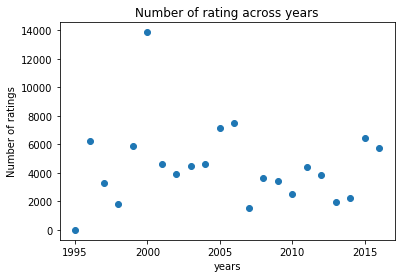

In [36]:
# draw the scatter plot between the ratings are speed across years or not

years = ratings_per_year.keys()
num_ratings = ratings_per_year.get_values()

plt.scatter(years, num_ratings)
plt.title('Number of rating across years')
plt.xlabel('years')
plt.ylabel('Number of ratings')
plt.show()

In [55]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years, num_ratings)
print('the slope is', slope )
print('the value of intercept is',intercept)
print('the r_value is', r_value)
print('the p value is', p_value)
print('the standard deviation is', std_err)

the slope is -32.6453980802
the value of intercept is 69985.9367589
the r_value is -0.0745661374819
the p value is 0.741558411987
the standard deviation is 97.6235491005


In [41]:
print('Generated linear model is y =' + str(slope) +' * x + ' + str(intercept))

Generated linear model is y =-32.6453980802 * x + 69985.9367589


In [42]:
def predict_num_ratings(year):
    return slope * year + intercept
predicted_ratings = predict_num_ratings(years)

print (predicted_ratings)

Float64Index([ 4858.367588932801,  4825.722190852619,  4793.076792772445,
               4760.431394692263,  4727.785996612081,    4695.1405985319,
               4662.495200451718, 4629.8498023715365,  4597.204404291355,
               4564.559006211173,  4531.913608130999,  4499.268210050817,
               4466.622811970636,  4433.977413890447,  4401.332015810272,
               4368.686617730098,  4336.041219649909,  4303.395821569735,
               4270.750423489546,  4238.105025409372,  4205.459627329183,
               4172.814229249008],
             dtype='float64', name='rating_year')


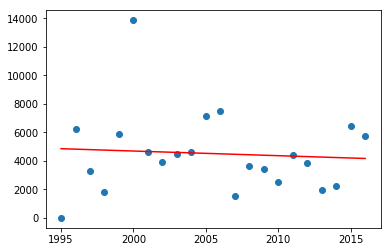

In [43]:
plt.scatter(years, num_ratings)
plt.plot(years, predicted_ratings, c='r')
plt.show()

In [44]:
r_square = r_value **2

print('the linear model r square value is', r_square)

the linear model r square value is 0.00556010885897


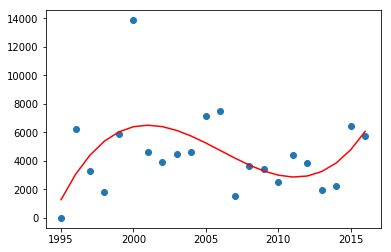

In [45]:
#polynomial model 

polynomial = np.poly1d(np.polyfit(years, num_ratings, 3))
plt.scatter(years, num_ratings)
plt.plot(years, polynomial(years), c='r')
plt.show()

In [46]:
from sklearn.metrics import r2_score

r2 = r2_score(num_ratings, polynomial(years))

print("the value of r_square by using polunomial model is", r2)

the value of r_square by using polunomial model is 0.269327171703


In [47]:
#predict the ratings in any year 

print (polynomial(2017))
print (polynomial(2018))

7772.22342682
9921.74998474
